<a href="https://colab.research.google.com/github/mjmesa-mm/dsl/blob/main/Entregas/ProyectoParteIII_Mesa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyecto Final – Parte III  
**Airline Passenger Satisfaction**

El presente proyecto analiza el dataset *Airline Passenger Satisfaction*, que son las respuestas de encuentas aplicadas a los pasajeros sobre distintos aspectos del servicio aéreo como: Wifi, comodidad del asiento, entretenimiento a bordo, puntualidad, manejo de equipaje, entre otros.

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?resource=download


**En este notebook se desarrolla la etapa final del proyecto de Data Science.
Se realiza selección de variables (feature selection), entrenamiento de un modelo
de clasificación, evaluación mediante métricas básicas y conclusiones finales.**


In [9]:

import pandas as pd

df = pd.read_csv('/content/test.csv')
df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [10]:

df.shape


(25976, 25)


## Preparación de datos


In [11]:

df['satisfaction'] = df['satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0
})

df = df.drop(columns=['id','Unnamed: 0'], errors='ignore')
df = df.dropna()

df.isna().sum().head()


,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0


Luego de la limpieza de datos, se verificó que el dataset no presenta valores faltantes en ninguna de sus variables, quedando listo para el entrenamiento del modelo.

In [12]:

df = pd.get_dummies(df, drop_first=True)
df.head()


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,52,160,5,4,3,4,3,4,3,5,...,5,5,50,44.0,1,False,False,False,True,False
1,36,2863,1,1,3,1,5,4,5,4,...,4,5,0,0.0,1,False,False,False,False,False
2,20,192,2,0,2,4,2,2,2,2,...,2,2,0,0.0,0,True,True,False,True,False
3,44,3377,0,0,0,2,3,4,4,1,...,1,4,0,6.0,1,True,False,False,False,False
4,49,1182,2,3,4,3,4,1,2,2,...,2,4,0,20.0,1,False,False,False,True,False


In [13]:
df.shape

(25893, 24)


## Feature Selection


In [14]:

from sklearn.feature_selection import SelectKBest, chi2

X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

selector = SelectKBest(score_func=chi2, k=10)
X_selected = selector.fit_transform(X, y)

X.columns[selector.get_support()]


Index(['Age', 'Flight Distance', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Type of Travel_Personal Travel',
       'Class_Eco'],
      dtype='object')

Las variables categóricas fueron transformadas a formato numérico mediante One-Hot Encoding utilizando pd.get_dummies, evitando colinealidad con el parámetro drop_first=True
  


## Modelo de Clasificación


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=3000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

Se fijó el parámetro random_state para garantizar la reproducibilidad de los resultados, asegurando que la partición entre los conjuntos de entrenamiento y prueba sea consistente entre ejecuciones.

**Métricas básicas de clasificación:**

accuracy_score → exactitud

precision_score → precisión

recall_score → sensibilidad

f1_score → balance entre precisión y recall

confusion_matrix → matriz de confusión


## Evaluación del Modelo


In [23]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)


(0.8412821007916587,
 0.8196078431372549,
 0.8217562254259502,
 0.8206806282722513)

**Accuracy:** El modelo clasifica correctamente el 84% de los pasajeros.

**Precisión:** Cuando el modelo predice que un pasajero está satisfecho, acierta aproximadamente el 82% de las veces.

**Recall:** El modelo identifica correctamente el 82% de los pasajeros satisfechos.

**f1_score**: El F1-score indica un balance adecuado entre precisión y sensibilidad.

El modelo de regresión logística obtuvo un **accuracy** del 84%, lo que indica un buen desempeño general en la clasificación de la satisfacción de los pasajeros. Asimismo, las métricas de **precision** (82%) y **recall**(82%) muestran un equilibrio adecuado entre la identificación correcta de pasajeros satisfechos y la minimización de falsos positivos. El **F1-score** refuerza este balance, confirmando la efectividad del modelo.


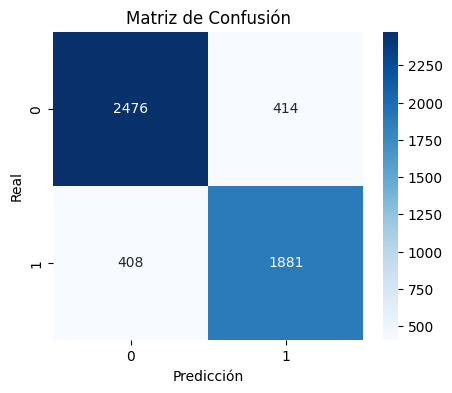

In [20]:

import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


**Positivo** > Pasajero SATISFECHO

**Negativo** > Pasajero NO SATISFECHO

En este proyecto se analizó el dataset Airline Passenger Satisfaction con el objetivo de identificar los factores que influyen en la satisfacción de los pasajeros de una aerolínea y evaluar la capacidad de un modelo de clasificación para predecir dicha satisfacción.

Inicialmente, se realizó una etapa de exploración y limpieza de datos, donde se transformó la variable objetivo satisfaction en un formato binario y se verificó la ausencia de valores faltantes. Posteriormente, las variables categóricas fueron convertidas a variables numéricas mediante One-Hot Encoding, lo que permitió preparar el dataset para su uso en modelos de aprendizaje automático.

Con el fin de reducir la dimensionalidad del conjunto de datos y seleccionar las variables más relevantes, se aplicó un método de feature selection utilizando SelectKBest con el estadístico chi-cuadrado. A partir de este proceso, se seleccionaron las diez variables con mayor relación con la satisfacción del pasajero.

Posteriormente, se entrenó un modelo de regresión logística, dividiendo los datos en conjuntos de entrenamiento y prueba (80% y 20%, respectivamente). El desempeño del modelo fue evaluado utilizando métricas de clasificación estándar como accuracy, precision, recall y F1-score, además de la matriz de confusión para una evaluación visual de los aciertos y errores del modelo.

Los resultados obtenidos muestran que el modelo alcanzó un accuracy del 84%, con valores de precision y recall cercanos al 82%, lo que indica un desempeño sólido y balanceado. La matriz de confusión evidenció un alto número de clasificaciones correctas tanto para pasajeros satisfechos como no satisfechos, y un número similar de falsos positivos y falsos negativos, lo que sugiere que el modelo no presenta sesgos significativos hacia ninguna de las clases


## Conclusiones

El modelo de regresión logística presenta un desempeño adecuado para predecir
la satisfacción de los pasajeros. La selección de variables permitió reducir
la dimensionalidad manteniendo las características más relevantes.
